<a href="https://colab.research.google.com/github/ECDias/CursoExtensaoPandas/blob/main/Curso_Extens%C3%A3o_Pandas_2%C2%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Segundo exemplo de manipulação de dados usando Python Pandas Veremos inserção de dados, remoção de colunas, merge, gráficos

Data: 9 e 10 de fevereiro de 2023

In [4]:
# Importando biblioteca pandas no Python
import pandas as pd

combustiveis_df = pd.read_excel("ca-2021-02.xlsx")
display(combustiveis_df.head())

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,GASOLINA,2021-11-01,6.799,NaN,R$ / litro,VIBRA ENERGIA
1,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,ETANOL,2021-11-01,5.299,NaN,R$ / litro,VIBRA ENERGIA
2,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,DIESEL,2021-11-01,5.549,NaN,R$ / litro,VIBRA ENERGIA
3,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,GASOLINA ADITIVADA,2021-11-01,6.899,NaN,R$ / litro,VIBRA ENERGIA
4,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,DIESEL S10,2021-11-01,5.649,NaN,R$ / litro,VIBRA ENERGIA


In [5]:
# Criar uma coluna "Obs" que tenha nela escrito "MELHOR CIDADE" quando a coluna Municipio for igual a SAO PAULO
combustiveis_df['Obs'] = ["MELHOR CIDADE" if municipio == 'SAO PAULO' else None for municipio in combustiveis_df['Municipio']]
display(combustiveis_df.loc[combustiveis_df['Municipio'].isin(['SAO PAULO','INDAIATUBA', 'CAMPINAS', 'SALTO']), ['Municipio', 'Obs']])

,Municipio,Obs
1601,SAO PAULO,MELHOR CIDADE
1602,SAO PAULO,MELHOR CIDADE
1603,SAO PAULO,MELHOR CIDADE
1604,SAO PAULO,MELHOR CIDADE
2607,CAMPINAS,None
...,...,...
165925,SAO PAULO,MELHOR CIDADE
165926,SAO PAULO,MELHOR CIDADE
166122,SAO PAULO,MELHOR CIDADE
166123,SAO PAULO,MELHOR CIDADE


In [6]:
# (por Leandro Rodrigues)
# como preencher uma coluna 'Valor de Venda - Status' que verifica o seguinte:
# se o valor de venda for maior que 6,5 reais, ele fala que tá Caro..caso contrário, está barato
import numpy as np

combustiveis_df['Status do Valor de Venda'] = np.where(combustiveis_df['Valor de Venda'] > 6.5, 'Caro', 'Barato')
display(combustiveis_df[['Revenda', 'Valor de Venda', 'Status do Valor de Venda']])

,Revenda,Valor de Venda,Status do Valor de Venda
0,POSTO ARAPIRACA LTDA,6.799,Caro
1,POSTO ARAPIRACA LTDA,5.299,Barato
2,POSTO ARAPIRACA LTDA,5.549,Barato
3,POSTO ARAPIRACA LTDA,6.899,Caro
4,POSTO ARAPIRACA LTDA,5.649,Barato
...,...,...,...
168404,COMERCIAL DE COMBUSTIVEL CACHOEIRINHA LTDA,5.859,Barato
168405,ABC DISTRIBUICAO DE PETROLEO LTDA,6.580,Caro
168406,ABC DISTRIBUICAO DE PETROLEO LTDA,4.740,Barato
168407,ABC DISTRIBUICAO DE PETROLEO LTDA,5.448,Barato


In [7]:
# Calcular postos de gasolina por habitantes temos na amostragem de combustiveis nov/2021

num_habitantes_df = pd.read_csv("ibge_num_habitantes_estimado.csv", sep = ";")
display(num_habitantes_df)

,Municipio,Estado,NumHabitantes2021
0,BELO HORIZONTE,MG,2530701
1,CAMPINAS,SP,1223237
2,CAMPO GRANDE,MS,916001
3,CURITIBA,PR,1963726
4,GOIANIA,GO,1555626
5,INDAIATUBA,SP,260690
6,NATAL,RN,803739
7,PALMAS,TO,313349
8,PENAPOLIS,SP,64098
9,PORTO ALEGRE,RS,1492530


In [8]:
# Calcular postos de gasolina por habitante temos na amostragem de 
# combustiveis nov/2021

num_habitantes_df = pd.read_csv("ibge_num_habitantes_estimado.csv", sep=";")
num_habitantes_df.rename(columns={"Estado":"Estado - Sigla"}, inplace=True)
display(num_habitantes_df)

,Municipio,Estado - Sigla,NumHabitantes2021
0,BELO HORIZONTE,MG,2530701
1,CAMPINAS,SP,1223237
2,CAMPO GRANDE,MS,916001
3,CURITIBA,PR,1963726
4,GOIANIA,GO,1555626
5,INDAIATUBA,SP,260690
6,NATAL,RN,803739
7,PALMAS,TO,313349
8,PENAPOLIS,SP,64098
9,PORTO ALEGRE,RS,1492530


In [16]:
# Faz um MERGE dos dois dataframes
colunas = ['Municipio', 'Estado - Sigla'] 
merge_df = combustiveis_df.merge(num_habitantes_df, how="inner", on=colunas)
display(merge_df)
print(merge_df.info())

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Obs,Status do Valor de Venda,NumHabitantes2021
0,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,GASOLINA,2021-11-01,6.999,NaN,R$ / litro,RAIZEN,None,Caro,1555626
1,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,ETANOL,2021-11-01,4.990,NaN,R$ / litro,RAIZEN,None,Barato,1555626
2,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,GASOLINA ADITIVADA,2021-11-01,7.130,NaN,R$ / litro,RAIZEN,None,Caro,1555626
3,CO,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,AVENIDA INDEPENDENCIA,2.908,NaN,VILA NOVA,74645-010,GASOLINA,2021-11-01,6.990,NaN,R$ / litro,BRANCA,None,Caro,1555626
4,CO,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,AVENIDA INDEPENDENCIA,2.908,NaN,VILA NOVA,74645-010,ETANOL,2021-11-01,4.990,NaN,R$ / litro,BRANCA,None,Barato,1555626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20629,SE,SP,INDAIATUBA,POSTO DOS ESTEVES LTDA,20.763.169/0001-00,AVENIDA ITORORO,160,NaN,CENTRO,13330-055,GASOLINA,2021-12-28,6.499,NaN,R$ / litro,IPIRANGA,None,Barato,260690
20630,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,NaN,CIDADE NOVA I,13334-170,DIESEL S10,2021-12-28,5.499,NaN,R$ / litro,RAIZEN,None,Barato,260690
20631,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,NaN,CIDADE NOVA I,13334-170,GASOLINA ADITIVADA,2021-12-28,6.699,NaN,R$ / litro,RAIZEN,None,Caro,260690
20632,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,NaN,CIDADE NOVA I,13334-170,ETANOL,2021-12-28,4.899,NaN,R$ / litro,RAIZEN,None,Barato,260690


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20634 entries, 0 to 20633
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Regiao - Sigla            20634 non-null  object        
 1   Estado - Sigla            20634 non-null  object        
 2   Municipio                 20634 non-null  object        
 3   Revenda                   20634 non-null  object        
 4   CNPJ da Revenda           20634 non-null  object        
 5   Nome da Rua               20634 non-null  object        
 6   Numero Rua                20634 non-null  object        
 7   Complemento               3837 non-null   object        
 8   Bairro                    20634 non-null  object        
 9   Cep                       20634 non-null  object        
 10  Produto                   20634 non-null  object        
 11  Data da Coleta            20634 non-null  datetime64[ns]
 12  Valor de Venda    

In [ ]:
# Faz um MERGE dos dois dataframes
colunas = ['Municipio', 'Estado - Sigla'] 
merge_df = combustiveis_df.merge(num_habitantes_df, how="left", on=colunas)
display(merge_df)
print(merge_df.info())

In [ ]:
# Faz um MERGE dos dois dataframes
colunas = ['Municipio', 'Estado - Sigla'] 
merge_df = combustiveis_df.merge(num_habitantes_df, how="right", on=colunas)
display(merge_df)
print(merge_df.info()) 

In [ ]:
# Faz um MERGE dos dois dataframes
colunas = ['Municipio', 'Estado - Sigla'] 
merge_df = combustiveis_df.merge(num_habitantes_df, how="outer", on=colunas)
display(merge_df)
print(merge_df.info())

In [ ]:
# Faz um MERGE dos dois dataframes
colunas = ['Municipio', 'Estado - Sigla'] 
merge_df = combustiveis_df.merge(num_habitantes_df, how="cross")
display(merge_df)
print(merge_df.info())

In [14]:
# Destruir coluna completamente vazias
merge_df.dropna(axis = 'columns', inplace = True)
print(merge_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3031362 entries, 0 to 3031361
Data columns (total 16 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Regiao - Sigla            object        
 1   Estado - Sigla_x          object        
 2   Municipio_x               object        
 3   Revenda                   object        
 4   CNPJ da Revenda           object        
 5   Nome da Rua               object        
 6   Cep                       object        
 7   Produto                   object        
 8   Data da Coleta            datetime64[ns]
 9   Valor de Venda            float64       
 10  Unidade de Medida         object        
 11  Bandeira                  object        
 12  Status do Valor de Venda  object        
 13  Municipio_y               object        
 14  Estado - Sigla_y          object        
 15  NumHabitantes2021         int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(13)

In [17]:
colunas=['Regiao - Sigla', 'Nome da Rua', 'Numero Rua', 
         'Bairro', 'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda',
         'Unidade de Medida', 'Bandeira', 'Status do Valor de Venda']
merge_df.drop(labels = colunas, axis = 1, inplace=True)
print(merge_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20634 entries, 0 to 20633
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Estado - Sigla     20634 non-null  object 
 1   Municipio          20634 non-null  object 
 2   Revenda            20634 non-null  object 
 3   CNPJ da Revenda    20634 non-null  object 
 4   Complemento        3837 non-null   object 
 5   Valor de Compra    0 non-null      float64
 6   Obs                5220 non-null   object 
 7   NumHabitantes2021  20634 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 1.4+ MB
None


In [18]:
# Remover a linhas duplicadas
merge_df.drop_duplicates(inplace = True)
display(merge_df.head(100))

,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Complemento,Valor de Compra,Obs,NumHabitantes2021
0,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,QUADRA08 LOTE 11E,NaN,None,1555626
3,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,NaN,NaN,None,1555626
7,GO,GOIANIA,POSTO DN LTDA,05.413.136/0001-47,QD. 47 - LT. 01A,NaN,None,1555626
11,GO,GOIANIA,POSTO ALDEIA LTDA,04.896.662/0001-42,NaN,NaN,None,1555626
15,GO,GOIANIA,AUTO POSTO SANTA LUZIA LTDA,04.142.631/0001-04,NaN,NaN,None,1555626
...,...,...,...,...,...,...,...,...
1677,RJ,RIO DE JANEIRO,POSTO SANTA CLARA DA PAVUNA II LTDA,06.955.648/0001-06,NaN,NaN,None,6775561
1682,RJ,RIO DE JANEIRO,POSTO SANTA CLARA DA PAVUNA LTDA,03.246.347/0001-07,NaN,NaN,None,6775561
1688,RJ,RIO DE JANEIRO,NOVA PARADINHA AUTO POSTO LTDA,07.594.094/0001-13,31 E 45,NaN,None,6775561
1694,RJ,RIO DE JANEIRO,AUTO POSTO LUAR DA PENHA LTDA.,07.035.006/0001-43,L.A. PAL 24008,NaN,None,6775561


In [19]:
#Agrupar e contar quantos postos tem na cidade..
postos_por_municipio_df = merge_df.groupby(by=['Estado - Sigla', 'Municipio', 'NumHabitantes2021']).count()
postos_por_municipio_df.drop('CNPJ da Revenda', axis=1, inplace=True)
postos_por_municipio_df.rename(columns = { "Revenda": "Numero de Postos"}, inplace = True)
display(postos_por_municipio_df)

,,,Numero de Postos,Complemento,Valor de Compra,Obs
Estado - Sigla,Municipio,NumHabitantes2021,,,,
AC,RIO BRANCO,419452,44,8,0,0
GO,GOIANIA,1555626,93,74,0,0
MG,BELO HORIZONTE,2530701,54,1,0,0
MS,CAMPO GRANDE,916001,104,12,0,0
PR,CURITIBA,1963726,110,11,0,0
RJ,RIO DE JANEIRO,6775561,379,58,0,0
RN,NATAL,803739,37,10,0,0
RO,PORTO VELHO,548952,40,1,0,0
RS,PORTO ALEGRE,1492530,73,5,0,0


In [20]:
#Agrupar e contar quantos postos tem na cidade..
postos_por_municipio_df = merge_df.groupby(by=['Estado - Sigla', 'Municipio', 'NumHabitantes2021']).count()
postos_por_municipio_df.reset_index(inplace=True)

#display(postos_por_municipio_df.info())
postos_por_municipio_df.drop('CNPJ da Revenda', axis=1, inplace=True)
postos_por_municipio_df.rename(columns={"Revenda": "NumPostos"}, inplace=True)

postos_por_municipio_df['PostosPorHabitante'] = postos_por_municipio_df['NumPostos'] / postos_por_municipio_df['NumHabitantes2021']
display(postos_por_municipio_df.info())
display(postos_por_municipio_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Estado - Sigla      15 non-null     object 
 1   Municipio           15 non-null     object 
 2   NumHabitantes2021   15 non-null     int64  
 3   NumPostos           15 non-null     int64  
 4   Complemento         15 non-null     int64  
 5   Valor de Compra     15 non-null     int64  
 6   Obs                 15 non-null     int64  
 7   PostosPorHabitante  15 non-null     float64
dtypes: float64(1), int64(5), object(2)
memory usage: 1.1+ KB


None

,Estado - Sigla,Municipio,NumHabitantes2021,NumPostos,Complemento,Valor de Compra,Obs,PostosPorHabitante
0,AC,RIO BRANCO,419452,44,8,0,0,0.000105
1,GO,GOIANIA,1555626,93,74,0,0,0.000060
2,MG,BELO HORIZONTE,2530701,54,1,0,0,0.000021
3,MS,CAMPO GRANDE,916001,104,12,0,0,0.000114
4,PR,CURITIBA,1963726,110,11,0,0,0.000056
5,RJ,RIO DE JANEIRO,6775561,379,58,0,0,0.000056
6,RN,NATAL,803739,37,10,0,0,0.000046
7,RO,PORTO VELHO,548952,40,1,0,0,0.000073
8,RS,PORTO ALEGRE,1492530,73,5,0,0,0.000049
9,SP,CAMPINAS,1223237,51,9,0,0,0.000042


In [21]:
#Agrupar e contar quantos postos tem na cidade..
postos_por_municipio_df = merge_df.groupby(by=['Estado - Sigla', 'Municipio', 'NumHabitantes2021']).count()
postos_por_municipio_df.reset_index(inplace=True)
#display(postos_por_municipio_df.info())
postos_por_municipio_df.drop('CNPJ da Revenda', axis=1, inplace=True)
postos_por_municipio_df.rename(columns={"Revenda": "NumPostos"}, inplace=True)

postos_por_municipio_df['NumHabitantesPorPosto'] = postos_por_municipio_df['NumHabitantes2021'] / postos_por_municipio_df['NumPostos']
#display(postos_por_municipio_df.info())
display(postos_por_municipio_df)

,Estado - Sigla,Municipio,NumHabitantes2021,NumPostos,Complemento,Valor de Compra,Obs,NumHabitantesPorPosto
0,AC,RIO BRANCO,419452,44,8,0,0,9533.000000
1,GO,GOIANIA,1555626,93,74,0,0,16727.161290
2,MG,BELO HORIZONTE,2530701,54,1,0,0,46864.833333
3,MS,CAMPO GRANDE,916001,104,12,0,0,8807.701923
4,PR,CURITIBA,1963726,110,11,0,0,17852.054545
5,RJ,RIO DE JANEIRO,6775561,379,58,0,0,17877.469657
6,RN,NATAL,803739,37,10,0,0,21722.675676
7,RO,PORTO VELHO,548952,40,1,0,0,13723.800000
8,RS,PORTO ALEGRE,1492530,73,5,0,0,20445.616438
9,SP,CAMPINAS,1223237,51,9,0,0,23985.039216


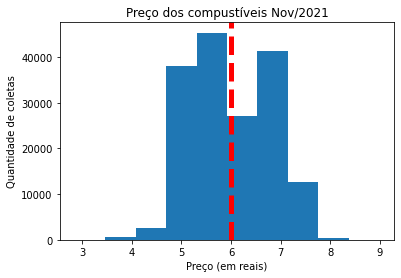

In [35]:
# Vamos brincar de gráficos!!!

import matplotlib.pyplot as plt

plt.hist(combustiveis_df['Valor de Venda'])

# Vamos colocar um título no gráfico
plt.title('Preço dos compustíveis Nov/2021')

# Rótulo horizontal
plt.xlabel('Preço (em reais)')

# Rótulo horizontal
plt.ylabel('Quantidade de coletas')

# Traça a linha vermelha tracejada com o preço médio
plt.axvline(combustiveis_df['Valor de Venda'].mean(), color = 'red', linestyle = 'dashed', linewidth = 5)

# "Plota" o gráfico
plt.show()

In [36]:
# Visualização do consumo médio
c_mean = combustiveis_df['Valor de Venda'].groupby(by=combustiveis_df['Produto']).mean()
display(c_mean)


Produto
DIESEL                5.375682
DIESEL S10            5.454901
ETANOL                5.456115
GASOLINA              6.708741
GASOLINA ADITIVADA    6.860422
GNV                   4.392935
Name: Valor de Venda, dtype: float64

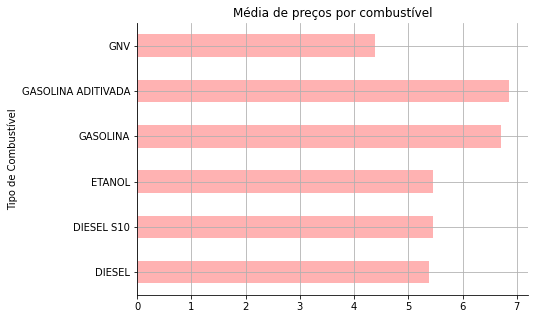

In [50]:
import seaborn as sns

# Vou definir a área do gráfico
plt.figure(figsize = (7,5))

# Plotar o gráfico
c_mean.plot(kind = 'barh', xlabel = 'Tipo de Combustível', ylabel = 'Preço reais/litro', title = 'Média de preços por combustível', color = 'red', alpha = 0.3)

# Grid
plt.grid()

# Remover as linhas superior e lateral direita do gráfico
sns.despine()

# Exibe
plt.show()

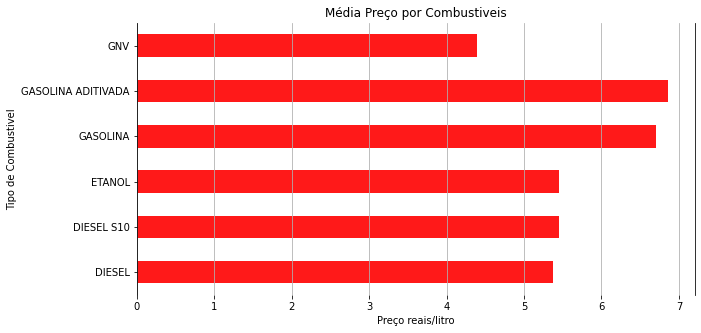

In [63]:
plt.figure(figsize=(10, 5))

c_mean_grafico = c_mean.plot(
    kind="barh",
    title= "Média Preço por Combustiveis",
    xlabel="Tipo de Combustivel",
    ylabel="Preço reais/litro",
    color="red",
    alpha = 0.9,
)

c_mean_grafico.set_ylabel("Tipo de Combustivel")
c_mean_grafico.set_xlabel("Preço reais/litro")

plt.grid(axis="x")

sns.despine(right=False, bottom=True)

plt.show()

In [62]:
# c_mean.reset_index(inplace = True)
display(c_mean)

excel = 'por_litro.xlsx'
c_mean.to_excel(excel, 'Sumário')

Produto
DIESEL                5.375682
DIESEL S10            5.454901
ETANOL                5.456115
GASOLINA              6.708741
GASOLINA ADITIVADA    6.860422
GNV                   4.392935
Name: Valor de Venda, dtype: float64

In [83]:
#Vamor personalizar a planilha Excel...
from openpyxl import load_workbook
from openpyxl.styles import PatternFill, Font, Color, Alignment

#Vai abrir o Excel no openpyxl
wb = load_workbook(excel) # wb = Workbook

#Pegar a planilha certa... usando o Sheet Name (nome da planilha)
ws = wb['Sumário'] # Work Sheet -> planilha atual, ativa, de trabalho

#Vamos pintar o cabeçalho da tabela de "cinzinha"
cinzinha = PatternFill("solid", fgColor="CCCCCC")
coords = ['A1', 'B1']
for coord in coords:
  ws[coord].fill = cinzinha

# Onde o preço do combustível for maior ou igual a 6,5 reais (6.5) pinta a fornte de vermelho e deixa negrito...
max_row = ws.max_row
num_linha = 2
while (num_linha <= max_row):
  coord = 'B' + str(num_linha) #coord = 'B{}'.format(num_linha)
  if ws[coord].value >= 6:
    ws[coord].font = Font(bold = True, color = 'FF0000')
  num_linha = num_linha + 1

#Salvar o Excel
wb.save(excel)